In [74]:

# Library Import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import plotly.graph_objs as go
import plotly.express as px
import cufflinks as cf

import warnings
warnings.filterwarnings("ignore")

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline();

# Base Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import label_binarize

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix as cm

In [75]:
test = pd.read_csv('test.csv')

In [76]:
train = pd.read_csv('train.csv')

In [77]:
df = train.copy()

In [78]:
print('Train Shape:', train.shape)
print('*'*25)
print('Test Shape:', test.shape)

Train Shape: (2000, 21)
*************************
Test Shape: (1000, 21)


In [79]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

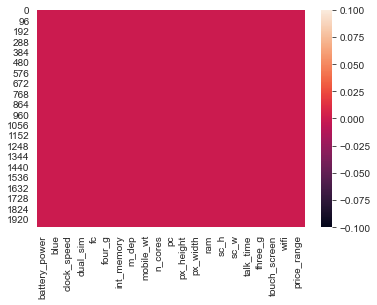

In [81]:
sns.heatmap(train.isnull());

In [82]:
df['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

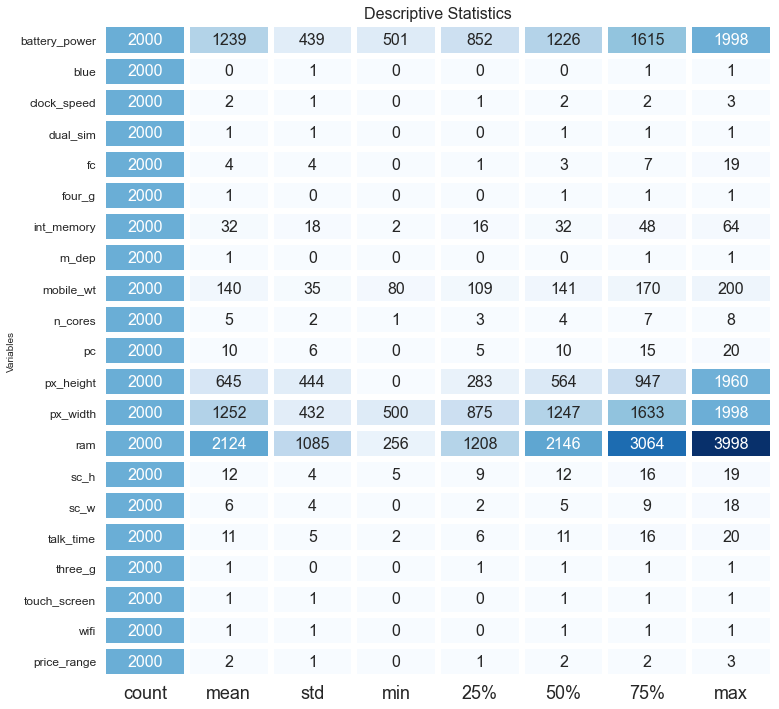

In [83]:
desc = df.describe().T
df1 = pd.DataFrame(index=['battery_power', 'blue', 'clock_speed', 'dual_sim',
                          'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 
                          'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
                          'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen',
                          'wifi', 'price_range'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

### Correlations

Text(0.5, 1.0, 'Correlations')

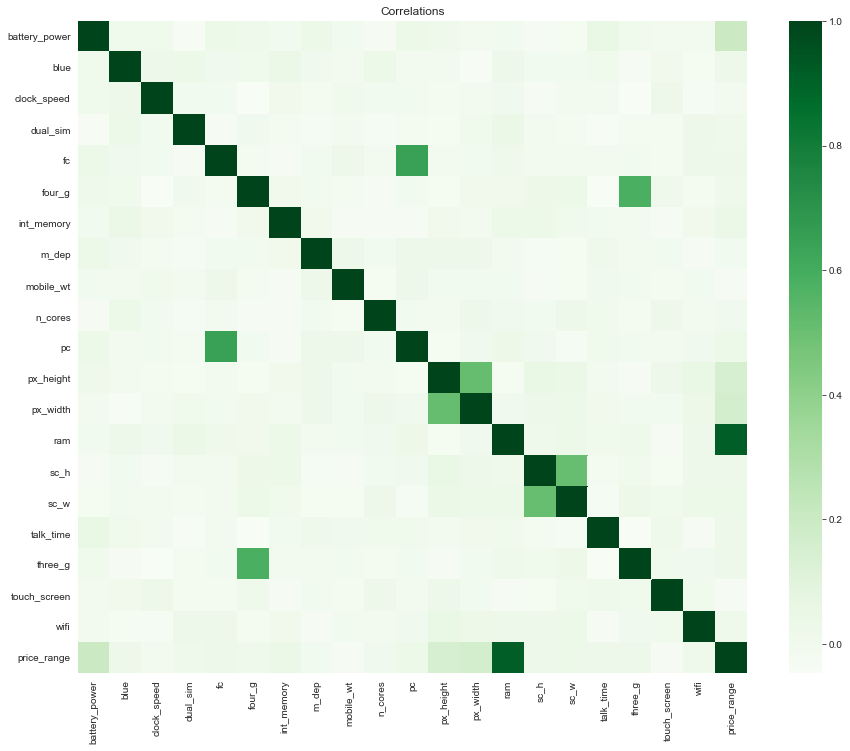

In [84]:
# Correlations

corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Greens')
r.set_title('Correlations')

In [87]:
df.corr().price_range.sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

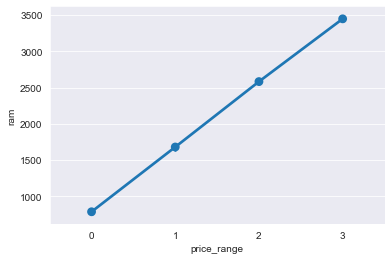

In [45]:
#Ram vs Price Range
sns.pointplot(y='ram',x='price_range',data=df);

<AxesSubplot:xlabel='price_range', ylabel='ram'>

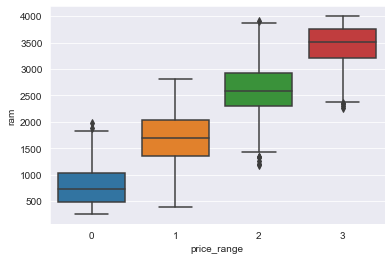

In [46]:
sns.boxplot(x='price_range', y='ram',data=df)

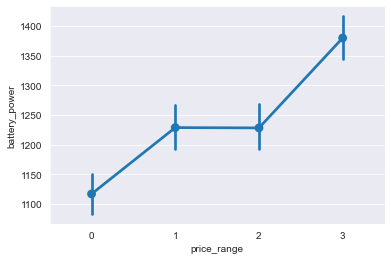

In [47]:
#Battery Power vs Price Range
sns.pointplot(y='battery_power',x='price_range',data=df);

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

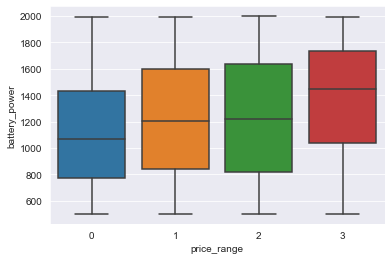

In [48]:
sns.boxplot(x='price_range', y='battery_power',data=df)

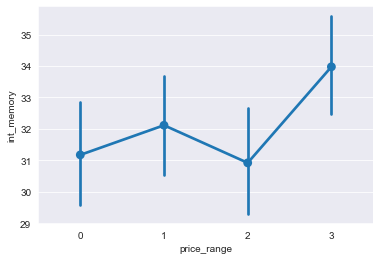

In [49]:
#Int Memory vs Price Range
sns.pointplot(y='int_memory',x='price_range',data=df);

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

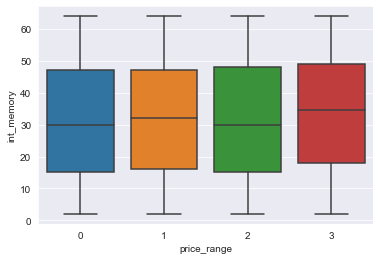

In [50]:
sns.boxplot(x='price_range', y='int_memory',data=df)

In [51]:
X = df.drop('price_range',axis=1)
y = df['price_range']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

### Linear regression

In [53]:
#linear regression
lrm = LinearRegression()
lrm.fit(X_train,y_train)
lrm.score(X_test,y_test)

0.9190369530612718

### K- Nearest Neighbours

In [54]:
knnm = KNeighborsClassifier(n_neighbors=10)
knnm.fit(X_train,y_train)
knnm.score(X_test,y_test)
y_knn_pred = knnm.predict(X_test)
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       169
           1       0.90      0.96      0.93       162
           2       0.89      0.87      0.88       162
           3       0.97      0.92      0.94       167

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



### Decision Tree 

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.8181818181818182

### Support vector machine


In [62]:
svmcm = SVC(C=0.1, kernel='rbf')
svmcm.fit(X_train,y_train)
svmcm.score(X_test,y_test)
y_svmcm_pred = svmcm.predict(X_test)
print(classification_report(y_test,y_svmcm_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       169
           1       0.86      0.90      0.88       162
           2       0.83      0.83      0.83       162
           3       0.93      0.89      0.91       167

    accuracy                           0.90       660
   macro avg       0.90      0.89      0.89       660
weighted avg       0.90      0.90      0.90       660



In [63]:
print("Confusion Matrix: Row labels: Actual class; Column labels: Predicted class")
print()
val=confusion_matrix(y_test,y_svmcm_pred)
print(val)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class

[[162   7   0   0]
 [  7 146   9   0]
 [  0  16 134  12]
 [  0   0  18 149]]


<AxesSubplot:>

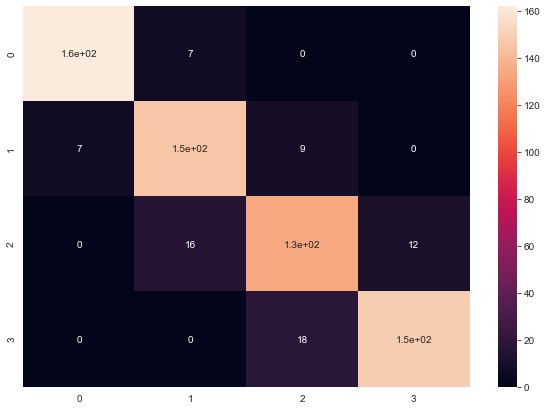

In [64]:
plt.figure(figsize = (10,7))
sns.heatmap(val,annot=True)

### Classification of test set using SVM

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

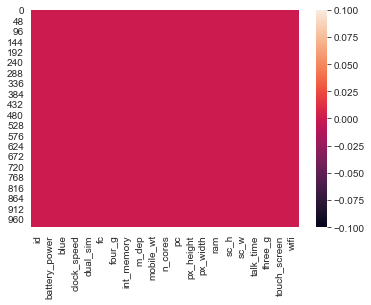

In [66]:
sns.heatmap(test.isnull());

In [67]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [68]:
test.drop('id',axis=1,inplace=True)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [69]:
pred_svmcm = svmcm.predict(test)
pred_svmcm

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 3, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 2, 3, 1, 2, 1, 0, 0, 1, 2, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

In [70]:
test['price_range'] = pred_svmcm

In [71]:
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


In [72]:
X = test.drop('price_range',axis=1)
y = test['price_range']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

svmcm_t = SVC(C=0.1)
svmcm_t.fit(X_train,y_train)
svmcm_t.score(X_test,y_test)

0.8818181818181818